<a href="https://colab.research.google.com/github/808hanronald/808hanronald/blob/main/W5_Project_(core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 5 (Core):


We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

  - Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
  - Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
  - Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.
  - Perform a train test split
  - Create a preprocessing object to prepare the dataset for Machine Learning
  - Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df=pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Inspect Data
## Duplicates

In [ ]:
df.duplicated().sum()

0

## Data types

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df=df.drop('Item_Identifier',axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Check for Inconsistencies

In [ ]:
str_cols = df.select_dtypes(exclude='number').columns
str_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value Counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, 

In [ ]:
df['Item_Fat_Content'].replace({'reg':'Regular', 'LF':"Low Fat", 'low fat':'Low Fat'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
for col in num_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


Value Counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value Counts for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


Value Counts for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


Value Counts for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845

In [ ]:
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# EDA Functions

In [ ]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



In [ ]:
# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



In [ ]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax



## Categorical


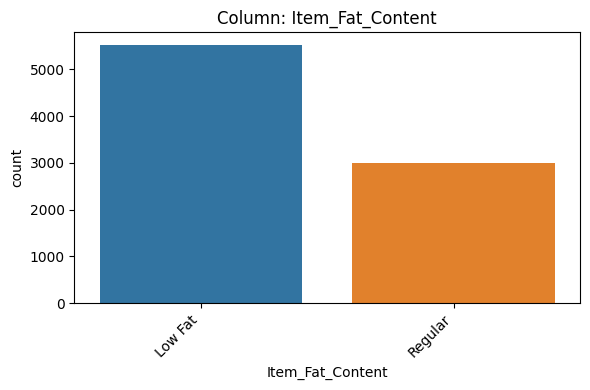

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,'Item_Fat_Content');

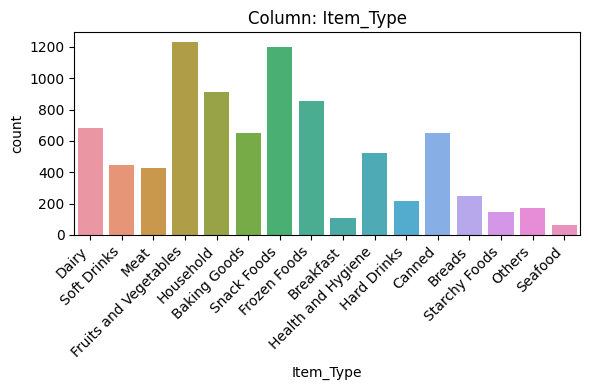

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,'Item_Type');

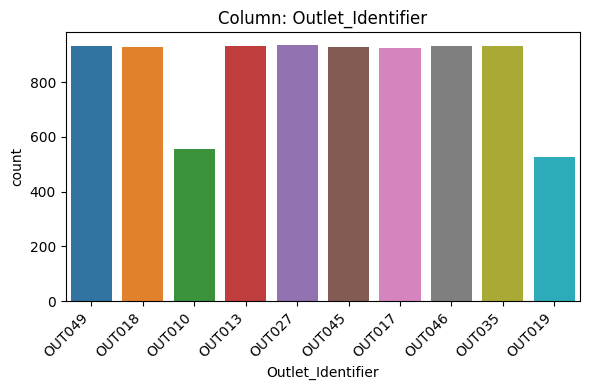

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,'Outlet_Identifier');

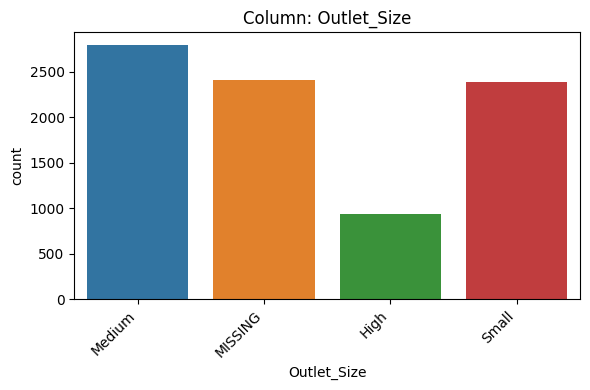

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,'Outlet_Size');

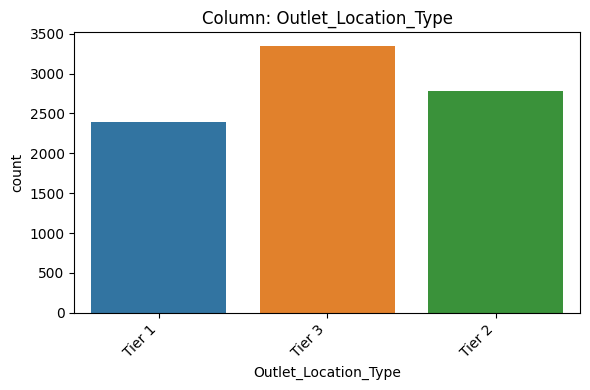

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,'Outlet_Location_Type');

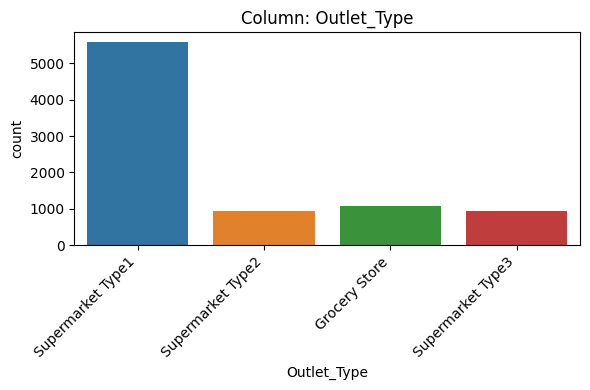

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df,'Outlet_Type');

### Vs Target

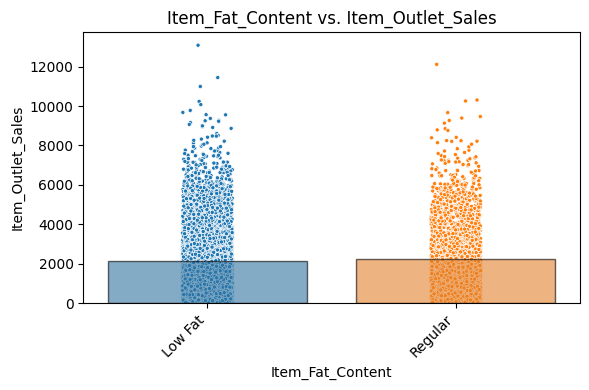

In [ ]:
fig,ax=plot_categorical_vs_target(df,x='Item_Fat_Content')

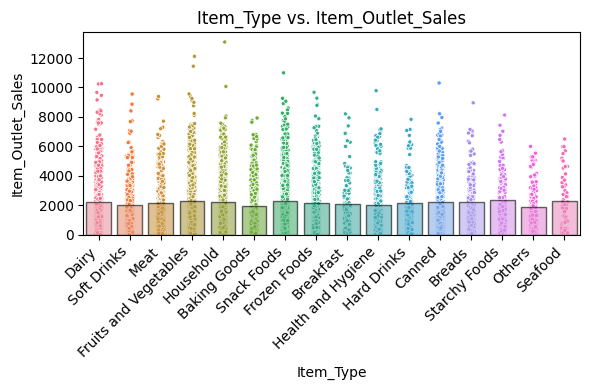

In [ ]:
fig,ax=plot_categorical_vs_target(df,x='Item_Type')

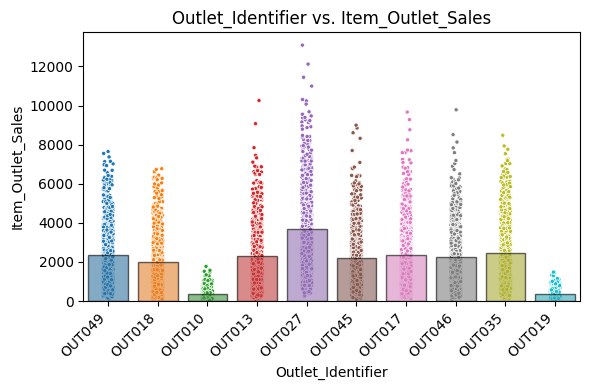

In [ ]:
fig,ax=plot_categorical_vs_target(df,x='Outlet_Identifier')

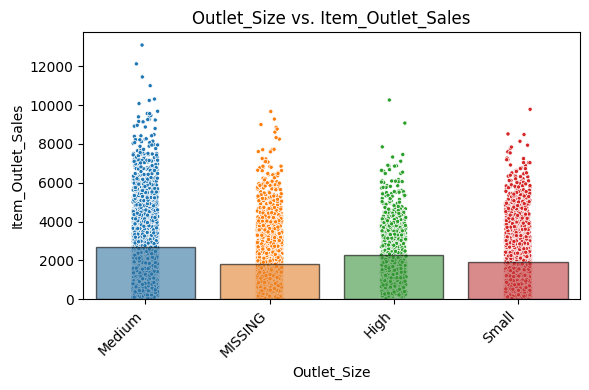

In [ ]:
fig,ax=plot_categorical_vs_target(df,x='Outlet_Size')

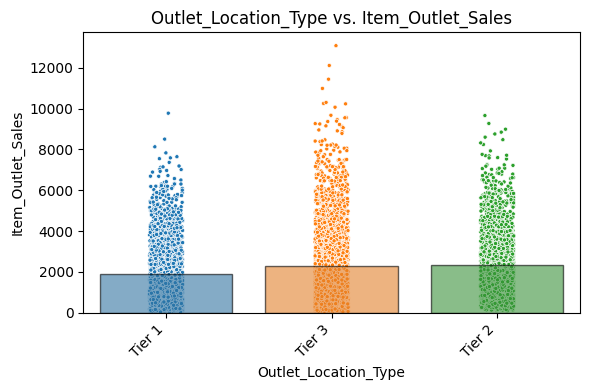

In [ ]:
fig,ax=plot_categorical_vs_target(df,x='Outlet_Location_Type')

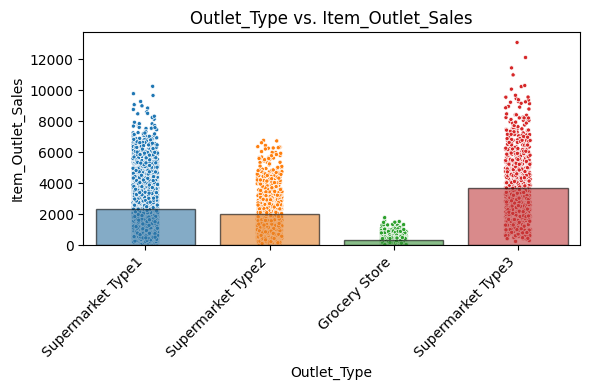

In [ ]:
fig,ax=plot_categorical_vs_target(df,x='Outlet_Type')

In [ ]:
str_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Numeric

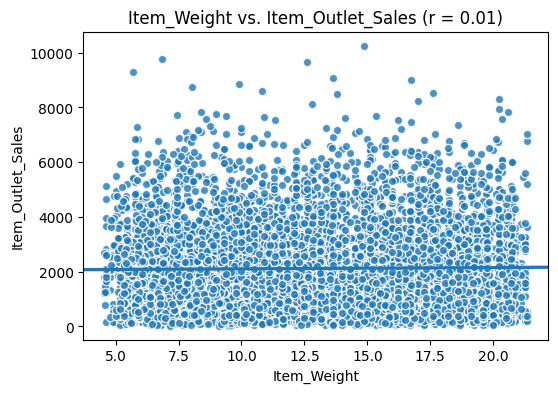

In [ ]:
fig,ax=plot_numeric_vs_target(df,'Item_Weight',truncate=False)

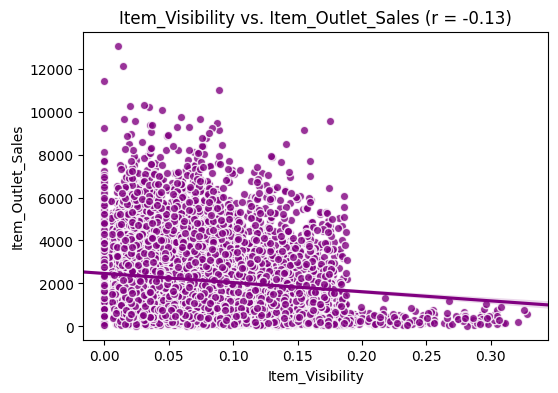

In [ ]:
fig,ax=plot_numeric_vs_target(df,'Item_Visibility', color='purple',truncate=False)

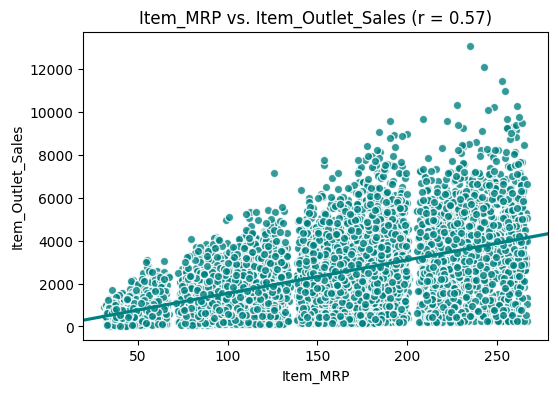

In [ ]:
fig,ax=plot_numeric_vs_target(df,'Item_MRP', color='teal',truncate=False)

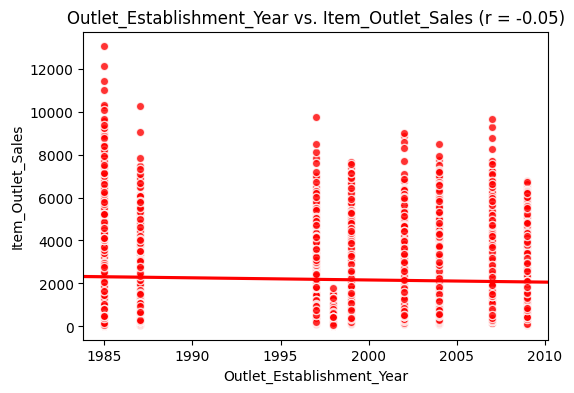

In [ ]:
fig,ax=plot_numeric_vs_target(df,'Outlet_Establishment_Year', color='red',truncate=False)

In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# Identify the features

In [ ]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y[:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
display(X_train.head(3),y_train.head(3))

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.35,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.25,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.35,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1


4776     515.3292
7510    3056.0220
5828    1577.9460
Name: Item_Outlet_Sales, dtype: float64

### Prepare the dataset for Machine Learning
#### SimpleImpute

In [ ]:
num_cols = X_train.select_dtypes(include='number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [ ]:
impute_mean = SimpleImputer(strategy ='mean')

In [ ]:
impute_mean.fit(X_train[num_cols])

SimpleImputer()

In [ ]:
impute_mean.statistics_

array([1.29044579e+01, 6.60070296e-02, 1.41980400e+02, 1.99785717e+03])

In [ ]:
X_train_num_imputed = impute_mean.transform(X_train[num_cols])
X_train_num_imputed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4776,16.350,0.029565,256.4646,2009.0
7510,15.250,0.000000,179.7660,2009.0
5828,12.350,0.158716,157.2946,1999.0
5327,7.975,0.014628,82.3250,2004.0
4810,19.350,0.016645,120.9098,2002.0
...,...,...,...,...
5734,9.395,0.286345,139.1838,1998.0
5191,15.600,0.117575,75.6670,2007.0
5390,17.600,0.018944,237.3590,2002.0
860,20.350,0.054363,117.9466,2007.0


In [ ]:
set_config(transform_output='pandas')
X_train_num_imputed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4776,16.350,0.029565,256.4646,2009.0
7510,15.250,0.000000,179.7660,2009.0
5828,12.350,0.158716,157.2946,1999.0
5327,7.975,0.014628,82.3250,2004.0
4810,19.350,0.016645,120.9098,2002.0


In [ ]:
X_train_num_imputed[num_cols].isna().sum().sum()

0

In [ ]:
X_test_num_imputed = impute_mean.transform(X_test[num_cols])
X_test_num_imputed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
7503,14.300000,0.026300,79.4302,1987.0
2957,7.930000,0.071136,42.7086,1997.0
7031,14.500000,0.041313,42.0454,1999.0
1084,12.904458,0.044767,173.7054,1985.0
856,10.195000,0.012456,197.5110,2004.0


In [ ]:
X_test_num_imputed[num_cols].isna().sum().sum()

0

### StandardScaler

In [ ]:
impute_mean = SimpleImputer(strategy = 'mean')
scaler = StandardScaler()

In [ ]:
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
num_pipe.fit(X_train[num_cols])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
X_train_num_tf = num_pipe.transform(X_train[num_cols])
X_train_num_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4776,0.817249,-0.712775,1.828109,1.327849
7510,0.556340,-1.291052,0.603369,1.327849
5828,-0.131512,1.813319,0.244541,0.136187
5327,-1.169219,-1.004931,-0.952591,0.732018
4810,1.528819,-0.965484,-0.336460,0.493686


In [ ]:
X_train_num_tf.isna().sum().sum()

0

In [ ]:
X_test_num_tf = num_pipe.transform(X_test[num_cols])
X_test_num_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
7503,3.310089e-01,-0.776646,-0.998816,-1.293807
2957,-1.179892e+00,0.100317,-1.585194,-0.102145
7031,3.784469e-01,-0.482994,-1.595784,0.136187
1084,4.213344e-16,-0.415440,0.506592,-1.532139
856,-6.426567e-01,-1.047426,0.886725,0.732018


In [ ]:
X_test_num_tf.isna().sum().sum()

0

### No Ordinal Columns




### Nominal Features

In [ ]:
ohe_cols = X_train.select_dtypes('object').columns
ohe_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
impute_na = SimpleImputer(strategy='constant', fill_value = 'NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [ ]:
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
ohe_pipe.fit(X_train[ohe_cols])

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
X_train_ohe_tf = ohe_pipe.transform(X_train[ohe_cols])
X_test_ohe_tf = ohe_pipe.transform(X_test[ohe_cols])
X_train_ohe_tf.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train_tf = pd.concat([X_train_num_tf, X_train_ohe_tf], axis = 1)
X_train_tf.info()
X_train_tf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Outlet_Establishment_Year        6392 non-null   float64
 4   Item_Fat_Content_Low Fat         6392 non-null   float64
 5   Item_Fat_Content_Regular         6392 non-null   float64
 6   Item_Type_Baking Goods           6392 non-null   float64
 7   Item_Type_Breads                 6392 non-null   float64
 8   Item_Type_Breakfast              6392 non-null   float64
 9   Item_Type_Canned                 6392 non-null   float64
 10  Item_Type_Dairy                  6392 non-null   float64
 11  Item_Type_Frozen Foods           6392 non-null   float64
 12  Item_Type_Fruits 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_tf = pd.concat([X_test_num_tf, X_test_ohe_tf], axis=1)
X_test_tf.info()
X_test_tf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      2131 non-null   float64
 1   Item_Visibility                  2131 non-null   float64
 2   Item_MRP                         2131 non-null   float64
 3   Outlet_Establishment_Year        2131 non-null   float64
 4   Item_Fat_Content_Low Fat         2131 non-null   float64
 5   Item_Fat_Content_Regular         2131 non-null   float64
 6   Item_Type_Baking Goods           2131 non-null   float64
 7   Item_Type_Breads                 2131 non-null   float64
 8   Item_Type_Breakfast              2131 non-null   float64
 9   Item_Type_Canned                 2131 non-null   float64
 10  Item_Type_Dairy                  2131 non-null   float64
 11  Item_Type_Frozen Foods           2131 non-null   float64
 12  Item_Type_Fruits 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,3.310089e-01,-0.776646,-0.998816,-1.293807,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.179892e+00,0.100317,-1.585194,-0.102145,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,3.784469e-01,-0.482994,-1.595784,0.136187,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,4.213344e-16,-0.415440,0.506592,-1.532139,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-6.426567e-01,-1.047426,0.886725,0.732018,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
